## CAR PRICE PREEDICTION

### 1.Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Set default setting of seaborn
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 2.Read the data

In [3]:
# read the data
data = pd.read_csv("D:\kaggle_project\car_data.ipynb.csv")


In [4]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
# print the first five rows of the data

data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3.Understand and Prepare the data

## 3.1 data types and dimensions

In [6]:
# check the data types for variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# data shape

data.shape

(301, 9)

## 3.2 Checking for Missing values

In [8]:
# get the count of missing values
missing_values = data.isnull().sum()

# print the count of missing values
print(missing_values)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


**There are no missing values in the dataset**

In [9]:
#showing some details about data

data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
# find the maximum Year in data set

np.max(data.Year)

2018

In [11]:
# convert Year to Age of each cars

Age = 2019 - data.Year

data.insert(0, "Age", Age)
data.drop('Year', axis = 1, inplace = True)

In [12]:
data

,Age,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,3,city,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,4,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,10,city,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2,city,11.50,12.50,9000,Diesel,Dealer,Manual,0


## 3.3 Data Correction

In [13]:
# showing data correlation

data.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner
Age,1.000000,-0.236141,0.047584,0.524342,0.182104
Selling_Price,-0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,0.182104,-0.088344,0.008057,0.089216,1.000000


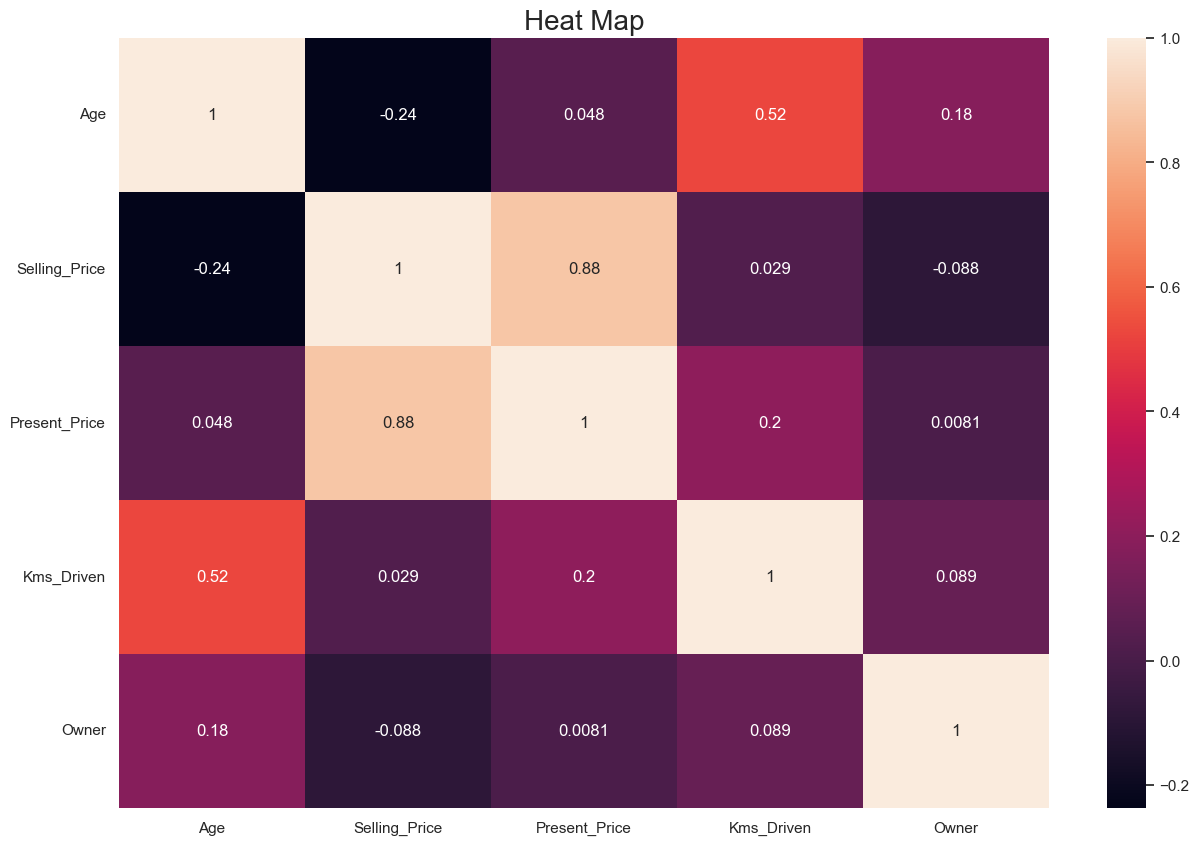

In [14]:
# draw Correlation Map 

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

## 4. EDA

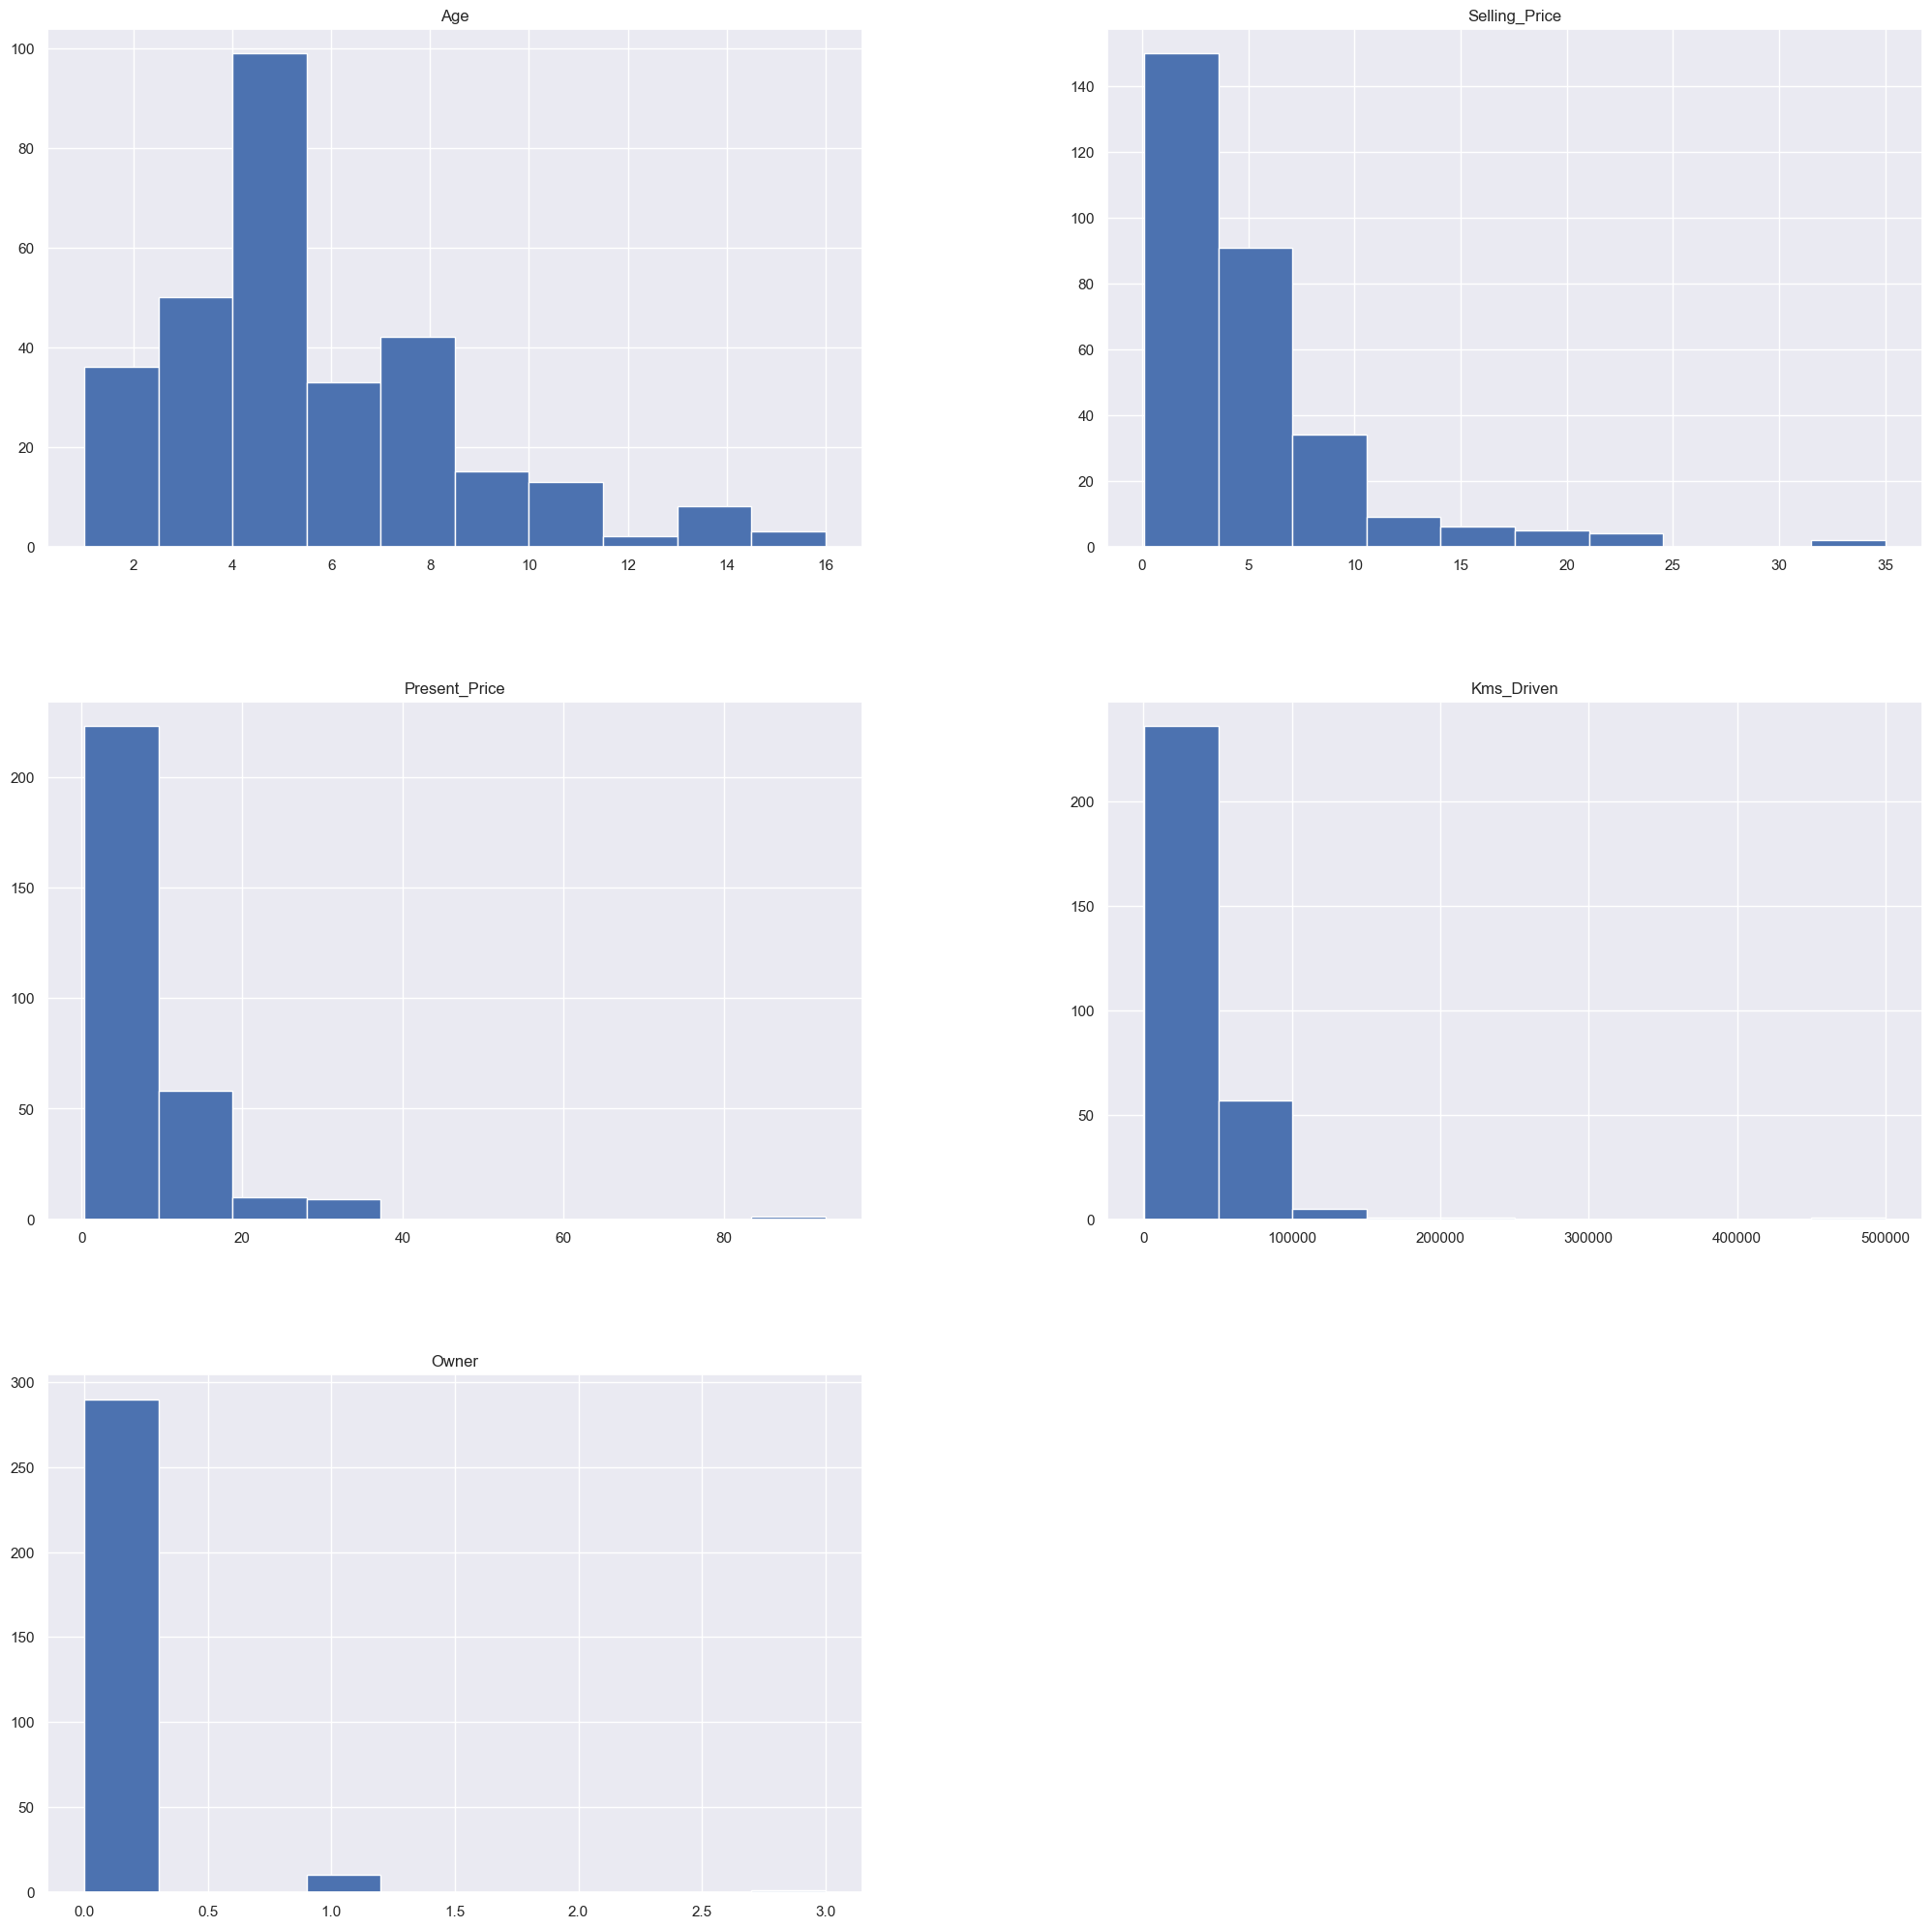

In [15]:
fig = data.hist(figsize = (25,25))

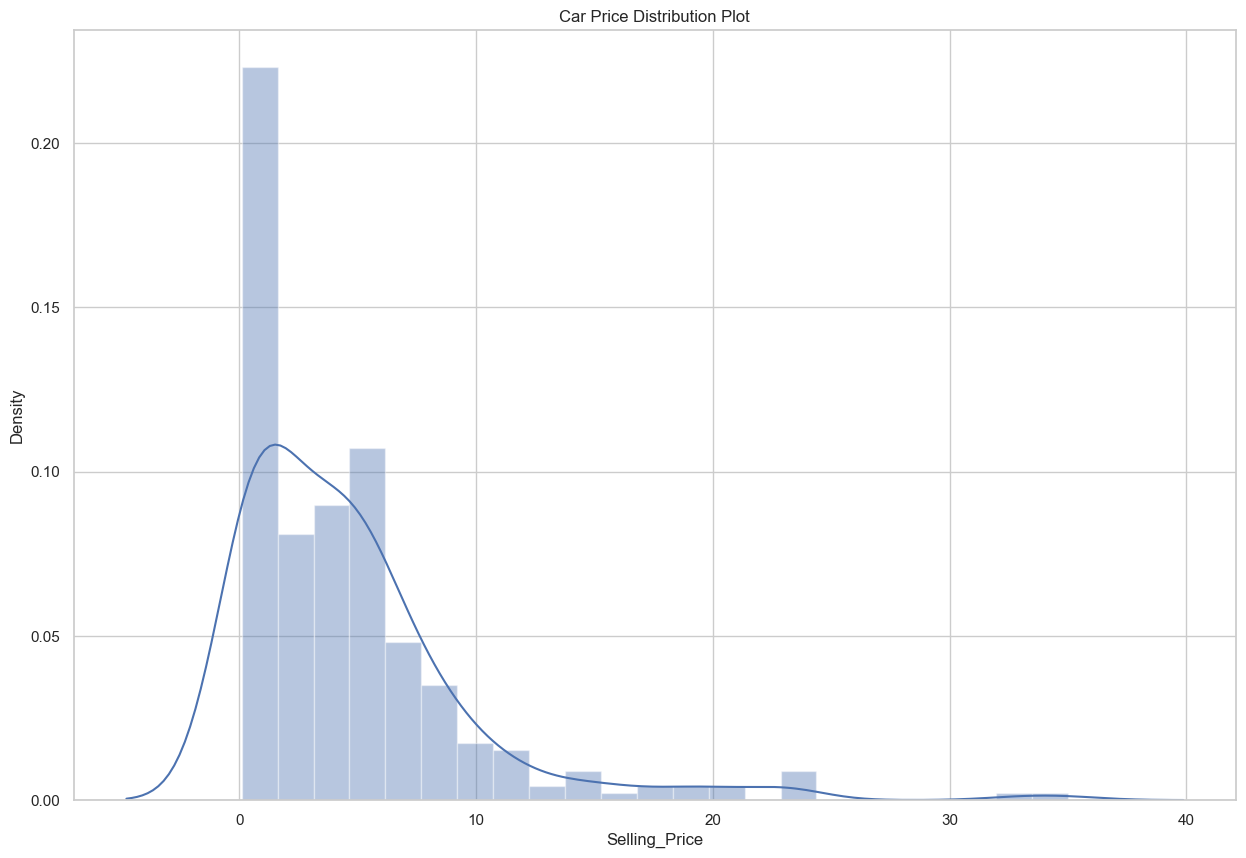

In [16]:
# Draw distribution diagram for Selling Price

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Selling_Price)
plt.title('Car Price Distribution Plot')
plt.show()

<AxesSubplot: xlabel='Transmission', ylabel='Selling_Price'>

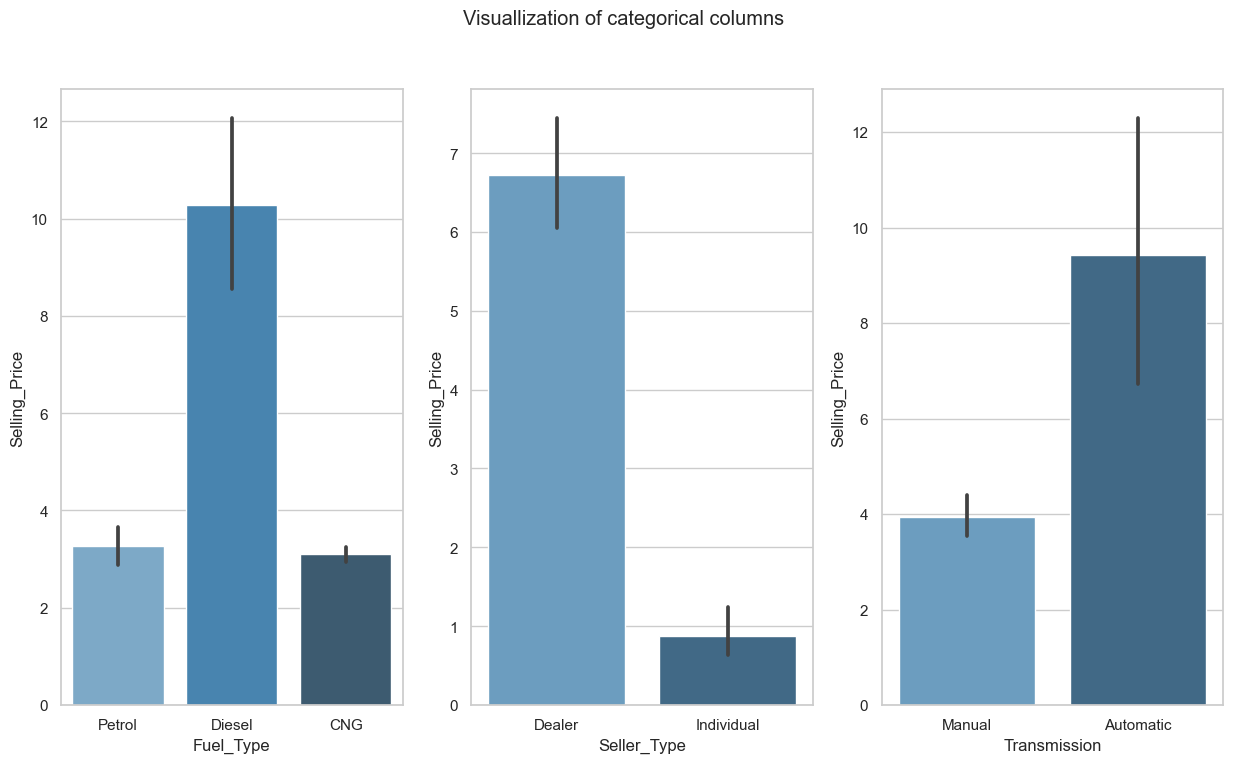

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Visuallization of categorical columns')

# Fuel_Type
sns.barplot(x = 'Fuel_Type', y = 'Selling_Price', data = data, ax = axes[0],palette="Blues_d")
# Seller_Type
sns.barplot(x = 'Seller_Type', y = 'Selling_Price', data = data, ax = axes[1],palette="Blues_d")

# Transmission
sns.barplot(x= 'Transmission', y = 'Selling_Price', data = data, ax = axes[2],palette="Blues_d")

<AxesSubplot: xlabel='Owner', ylabel='Selling_Price'>

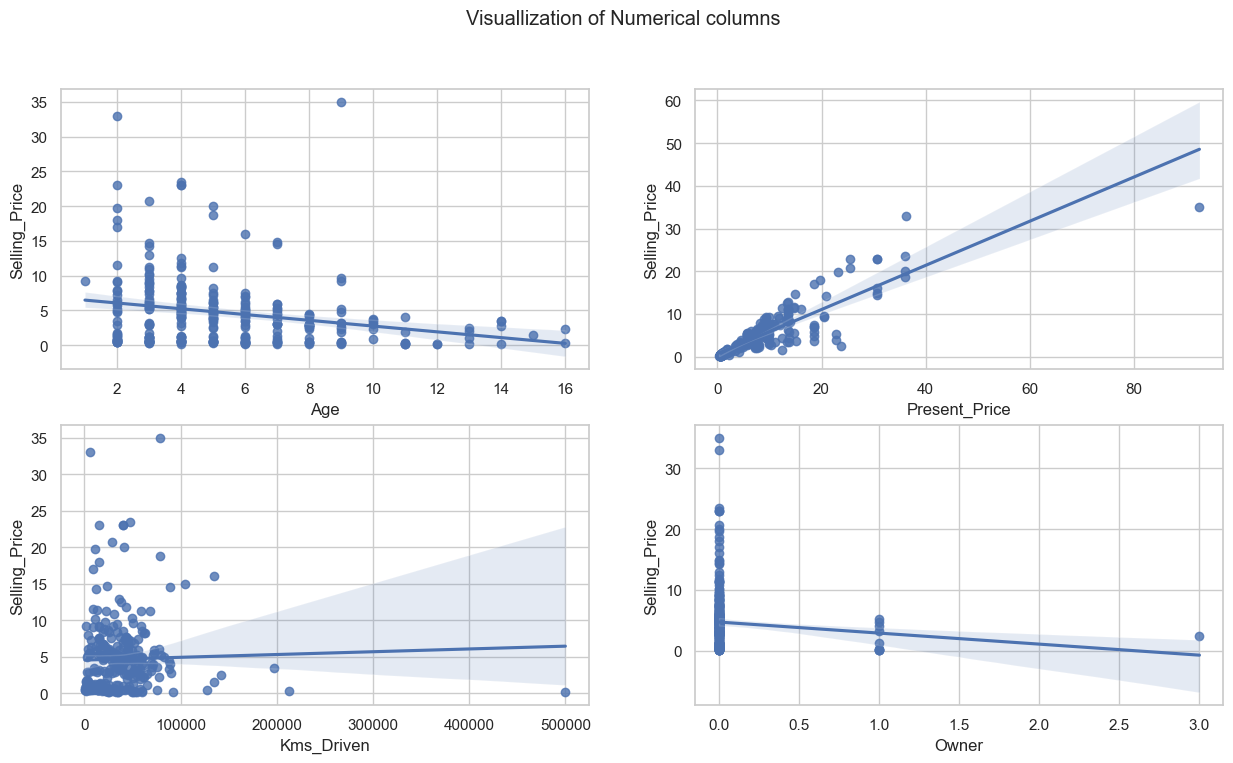

In [18]:
fig, axes = plt.subplots(2, 2, figsize = (15,8))
fig.suptitle('Visuallization of Numerical columns')

sns.regplot(x = 'Age', y = 'Selling_Price', data = data, ax = axes[0,0])
sns.regplot(x = 'Present_Price', y = 'Selling_Price', data = data, ax = axes[0,1])
sns.regplot(x = 'Kms_Driven', y = 'Selling_Price', data = data, ax = axes[1,0])
sns.regplot(x = 'Owner', y = 'Selling_Price', data = data, ax = axes[1,1])

Changing categorical features to numerical

In [19]:
print("Fuel Type    = ", data.Fuel_Type.unique(),"\n")
print("Seller Type  = ", data.Seller_Type.unique(), "\n")
print("Transmission = ", data.Transmission.unique(), "\n")
print("Owner        = ", data.Owner.unique(), "\n")

Fuel Type    =  ['Petrol' 'Diesel' 'CNG'] 

Seller Type  =  ['Dealer' 'Individual'] 

Transmission =  ['Manual' 'Automatic'] 

Owner        =  [0 1 3] 



In [20]:
data.Fuel_Type.value_counts()
data.Seller_Type.value_counts()
data.Transmission.value_counts()
data.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [21]:
# changing categorical features to numerical

data["Fuel_Type"].replace({'Petrol':2, 'Diesel':3, 'CNG':4},inplace = True)
data["Seller_Type"].replace({'Dealer':2, 'Individual':3}, inplace = True)
data["Transmission"].replace({'Manual':2, 'Automatic':3}, inplace = True)
data.drop("Car_Name", axis=1, inplace = True)


In [22]:
data

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,2,2,2,0
1,6,4.75,9.54,43000,3,2,2,0
2,2,7.25,9.85,6900,2,2,2,0
3,8,2.85,4.15,5200,2,2,2,0
4,5,4.60,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...
296,3,9.50,11.60,33988,3,2,2,0
297,4,4.00,5.90,60000,2,2,2,0
298,10,3.35,11.00,87934,2,2,2,0
299,2,11.50,12.50,9000,3,2,2,0


In [23]:
# Showing data columns Data Type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    int64  
 5   Seller_Type    301 non-null    int64  
 6   Transmission   301 non-null    int64  
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 18.9 KB


In [24]:
data.describe()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,5.372093,4.661296,7.628472,36947.205980,2.212625,2.352159,2.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,1.000000,0.100000,0.320000,500.000000,2.000000,2.000000,2.000000,0.000000
25%,3.000000,0.900000,1.200000,15000.000000,2.000000,2.000000,2.000000,0.000000
50%,5.000000,3.600000,6.400000,32000.000000,2.000000,2.000000,2.000000,0.000000
75%,7.000000,6.000000,9.900000,48767.000000,2.000000,3.000000,2.000000,0.000000
max,16.000000,35.000000,92.600000,500000.000000,4.000000,3.000000,3.000000,3.000000


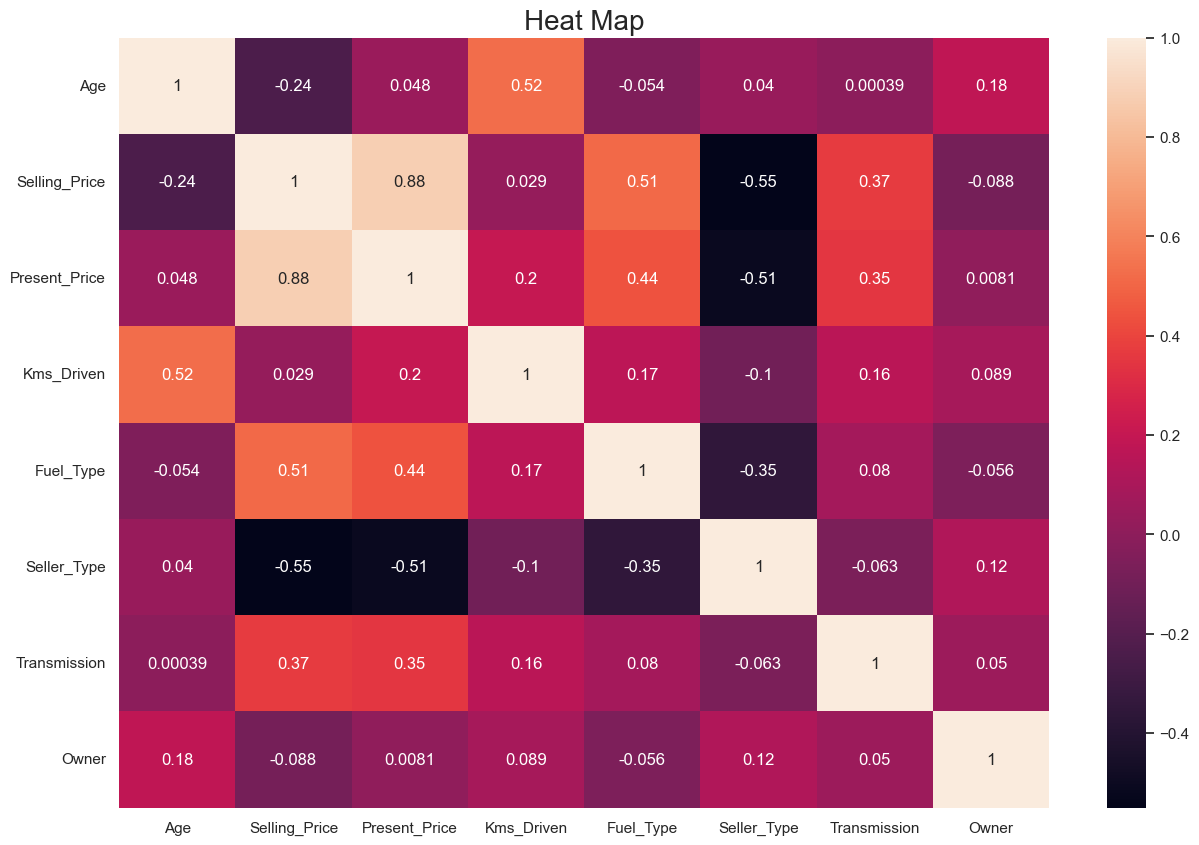

In [25]:
 # Heat Map for correlation

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.yticks(rotation = 0)
plt.title('Heat Map', size=20)
plt.show()


**Split data into train and test**

In [26]:
# extract the predictor variables
X = (data.iloc[:, -1])
# extract the target variable
y = (data.iloc[:, 1])

In [27]:
from sklearn.model_selection import train_test_split
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (240,)
X_test  (61,)
y_train  (240,)
y_test  (61,)


In [28]:
x = pd.DataFrame(data, columns = ['Age','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'])
y = data['Selling_Price'].values.reshape(-1, 1)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
model.intercept_

array([-0.0124171])

In [33]:
model.coef_

array([[-3.92595063e-01,  4.36619980e-01, -5.48584299e-06,
         1.44377315e+00, -1.12076998e+00,  1.43830531e+00,
        -9.89222658e-01]])

In [34]:
# Evalutions

# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, y_pred))


Mean Absolute Error     :  1.0000326012148015


In [35]:
# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, y_pred))


Mean Squared Error      :  2.1885564456593225


In [36]:
# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))


Root Mean Squared Error :  1.4793770464825127


In [37]:
#R2 Score
print("R2 Score                : ", metrics.r2_score(Y_test, y_pred))

R2 Score                :  0.913418172122386


In [38]:
x1 = x.copy()

# make a function for features dimenation

def Dimenations(column, dimenation):
    
    new_column = x1[column]**dimenation
    x1.insert(0, str(column)+ str(dimenation), new_column)

    # make a function for Train model and show New R2 Score

def Training_R2():
    
    X_train2, X_test2, Y_train2, Y_test2 = train_test_split(x1, y, test_size = 0.2, random_state = 0)
    model2 = LinearRegression()
    model2.fit(X_train2, Y_train2)
    Y_pred2 = model2.predict(X_test2)
    
    print("NEW R2 Score : ", metrics.r2_score(Y_test2, Y_pred2))

In [39]:
Dimenations("Present_Price", 2)
Training_R2()

NEW R2 Score :  0.9198798658488008


In [40]:
Dimenations("Kms_Driven", 2)
Training_R2()

NEW R2 Score :  0.9279862424439951


In [41]:
Dimenations("Fuel_Type", 2)
Training_R2()

NEW R2 Score :  0.9285797570184762


In [42]:
Dimenations("Owner", 2)
Training_R2()

NEW R2 Score :  0.9311515369361717


In [43]:
x = x1
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,4,729000000,31.2481,5,5.59,27000,2,2,2,0
1,0,9,1849000000,91.0116,6,9.54,43000,3,2,2,0
2,0,4,47610000,97.0225,2,9.85,6900,2,2,2,0
3,0,4,27040000,17.2225,8,4.15,5200,2,2,2,0
4,0,9,1802002500,47.1969,5,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,3,11.60,33988,3,2,2,0
297,0,4,3600000000,34.8100,4,5.90,60000,2,2,2,0
298,0,4,7732388356,121.0000,10,11.00,87934,2,2,2,0
299,0,9,81000000,156.2500,2,12.50,9000,3,2,2,0


R2 Score = 0.9311515303255717

In [44]:
x1.insert(0, "PressPrice_Kms", x1.Present_Price * x1.Kms_Driven)
Training_R2()

NEW R2 Score :  0.9503856315516871


In [45]:
x1.insert(0, "PressPrice_Kms2", x.Present_Price * x1.Kms_Driven2)
Training_R2()

NEW R2 Score :  0.9582517324300022


In [46]:
x1.insert(0, "PressPrice2_Kms", x1.Present_Price2 * x1.Kms_Driven)
Training_R2()

NEW R2 Score :  0.9562007290547601


In [47]:
x1.insert(0, "PressPrice2_Kms2", x1.Present_Price2 * x1.Kms_Driven2)
Training_R2()

NEW R2 Score :  0.9592459937557773


In [48]:
x1.insert(0, "PressPrice_Fuel", x1.Present_Price * x1.Fuel_Type)
Training_R2()

NEW R2 Score :  0.9615642486518966


In [49]:
x1.insert(0, "PressPrice_Fuel2", x1.Present_Price * x1.Fuel_Type2)
Training_R2()

NEW R2 Score :  0.9612778770904947


In [50]:
x = x1
x

,PressPrice_Fuel2,PressPrice_Fuel,PressPrice2_Kms2,PressPrice2_Kms,PressPrice_Kms2,PressPrice_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,22.36,11.18,2.277986e+10,8.436987e+05,4.075110e+09,150930.0,0,4,729000000,31.2481,5,5.59,27000,2,2,2,0
1,85.86,28.62,1.682804e+11,3.913499e+06,1.763946e+10,410220.0,0,9,1849000000,91.0116,6,9.54,43000,3,2,2,0
2,39.40,19.70,4.619241e+09,6.694552e+05,4.689585e+08,67965.0,0,4,47610000,97.0225,2,9.85,6900,2,2,2,0
3,16.60,8.30,4.656964e+08,8.955700e+04,1.122160e+08,21580.0,0,4,27040000,17.2225,8,4.15,5200,2,2,2,0
4,61.83,20.61,8.504893e+10,2.003508e+06,1.237976e+10,291631.5,0,9,1802002500,47.1969,5,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,104.40,34.80,1.554416e+11,4.573425e+06,1.340014e+10,394260.8,0,9,1155184144,134.5600,3,11.60,33988,3,2,2,0
297,23.60,11.80,1.253160e+11,2.088600e+06,2.124000e+10,354000.0,0,4,3600000000,34.8100,4,5.90,60000,2,2,2,0
298,44.00,22.00,9.356190e+11,1.064001e+07,8.505627e+10,967274.0,0,4,7732388356,121.0000,10,11.00,87934,2,2,2,0
299,112.50,37.50,1.265625e+10,1.406250e+06,1.012500e+09,112500.0,0,9,81000000,156.2500,2,12.50,9000,3,2,2,0


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)


print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error     :  0.6694933394213354
Mean Squared Error      :  0.9787914365009798
Root Mean Squared Error :  0.9893388886023736
R2 Score                :  0.9612778770904947


R2 Score = 0.9612748373179915

In [52]:
# remove the indexs by negative Scores

x1 = x[x.index<100]
x2 = x[x.index>151]
x_new = x1.append(x2)
x_new.reset_index(drop=True, inplace=True)
x_new

,PressPrice_Fuel2,PressPrice_Fuel,PressPrice2_Kms2,PressPrice2_Kms,PressPrice_Kms2,PressPrice_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,22.36,11.18,2.277986e+10,8.436987e+05,4.075110e+09,150930.0,0,4,729000000,31.2481,5,5.59,27000,2,2,2,0
1,85.86,28.62,1.682804e+11,3.913499e+06,1.763946e+10,410220.0,0,9,1849000000,91.0116,6,9.54,43000,3,2,2,0
2,39.40,19.70,4.619241e+09,6.694552e+05,4.689585e+08,67965.0,0,4,47610000,97.0225,2,9.85,6900,2,2,2,0
3,16.60,8.30,4.656964e+08,8.955700e+04,1.122160e+08,21580.0,0,4,27040000,17.2225,8,4.15,5200,2,2,2,0
4,61.83,20.61,8.504893e+10,2.003508e+06,1.237976e+10,291631.5,0,9,1802002500,47.1969,5,6.87,42450,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,104.40,34.80,1.554416e+11,4.573425e+06,1.340014e+10,394260.8,0,9,1155184144,134.5600,3,11.60,33988,3,2,2,0
245,23.60,11.80,1.253160e+11,2.088600e+06,2.124000e+10,354000.0,0,4,3600000000,34.8100,4,5.90,60000,2,2,2,0
246,44.00,22.00,9.356190e+11,1.064001e+07,8.505627e+10,967274.0,0,4,7732388356,121.0000,10,11.00,87934,2,2,2,0
247,112.50,37.50,1.265625e+10,1.406250e+06,1.012500e+09,112500.0,0,9,81000000,156.2500,2,12.50,9000,3,2,2,0


In [53]:
y  = data["Selling_Price"]
y1 = y[y.index<100]
y2 = y[y.index>151]
y_new = y1.append(y2)
y_new.reset_index(drop=True, inplace=True)
y_new.shape

(249,)

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print("Mean Absolute Error     : ", metrics.mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error      : ", metrics.mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R2 Score                : ", metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error     :  0.6645807991724147
Mean Squared Error      :  0.7289129280733979
Root Mean Squared Error :  0.8537639767953423
R2 Score                :  0.980168789990497


In [55]:
model.intercept_

9.972154770388833

In [56]:
model.coef_

array([-2.87827229e-01,  1.71552312e+00,  1.44573242e-12, -7.34422856e-08,
        1.32262430e-11, -9.97165367e-06, -5.50932365e-01,  1.25360347e+00,
       -7.20701084e-11, -4.46111361e-03, -2.96758851e-01, -1.34567057e+00,
        4.01799003e-05, -7.73744998e+00, -1.02736584e-01,  7.20997971e-01,
        9.24002832e-01])

R2 Score = 0.9801683909737401

Conclusion

In [57]:
X_test.insert(0, "Y_test", Y_test)
X_test.insert(0, "Y_pred", Y_pred)

In [58]:
data = X_test.sort_values(by="Present_Price")

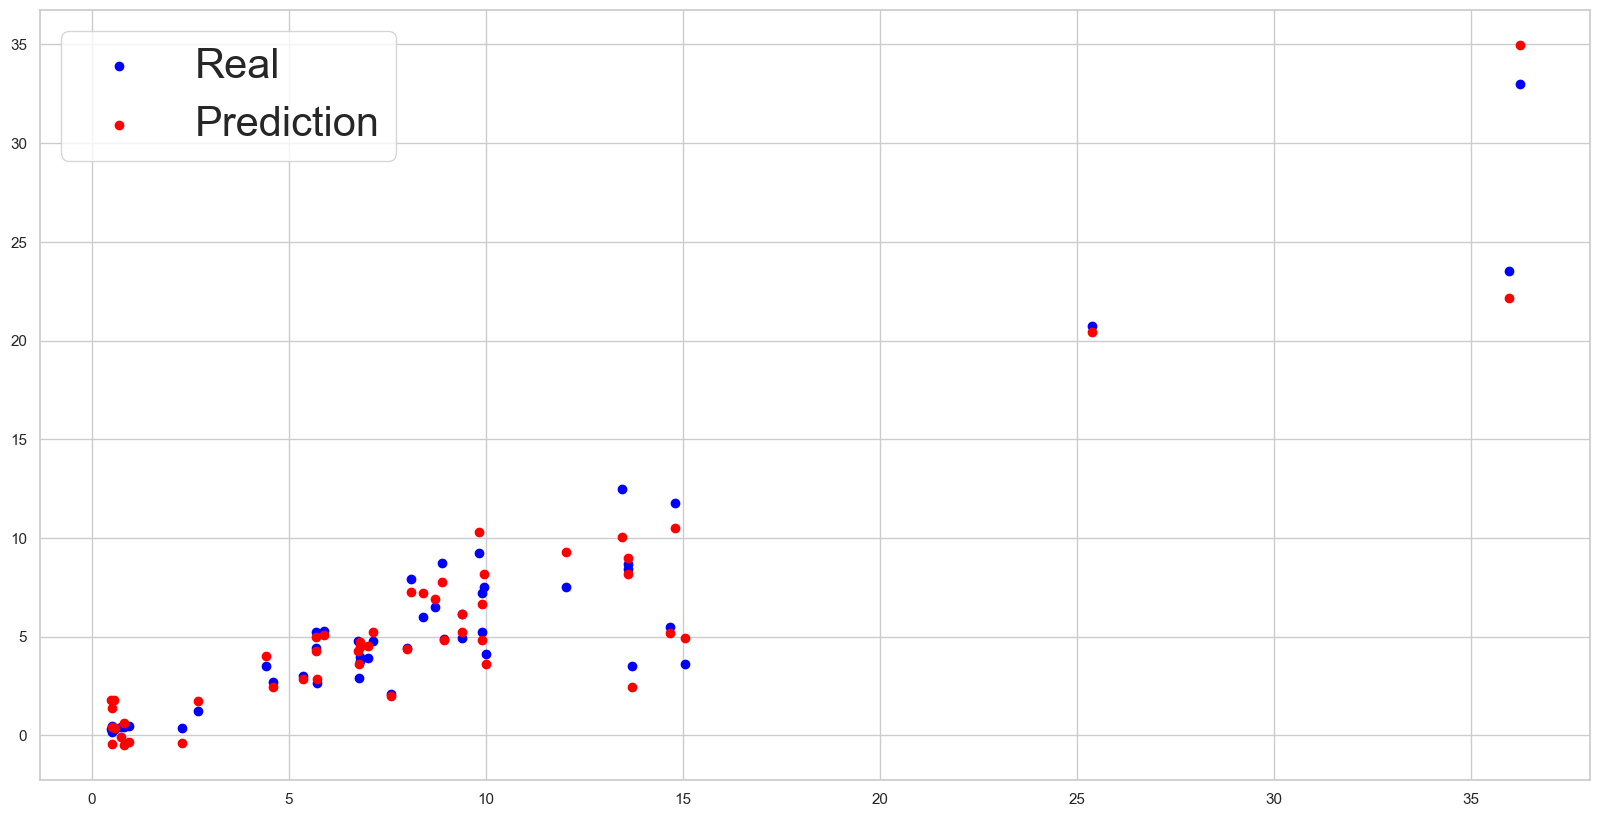

In [59]:
# checking the model by visualization

plt.figure(figsize=(20, 10))
plt.scatter(data.Present_Price ,data.Y_test, color='blue', label="Real")
plt.scatter(data.Present_Price, data.Y_pred, color='red', label="Prediction")
plt.legend(fontsize=30)
plt.show()

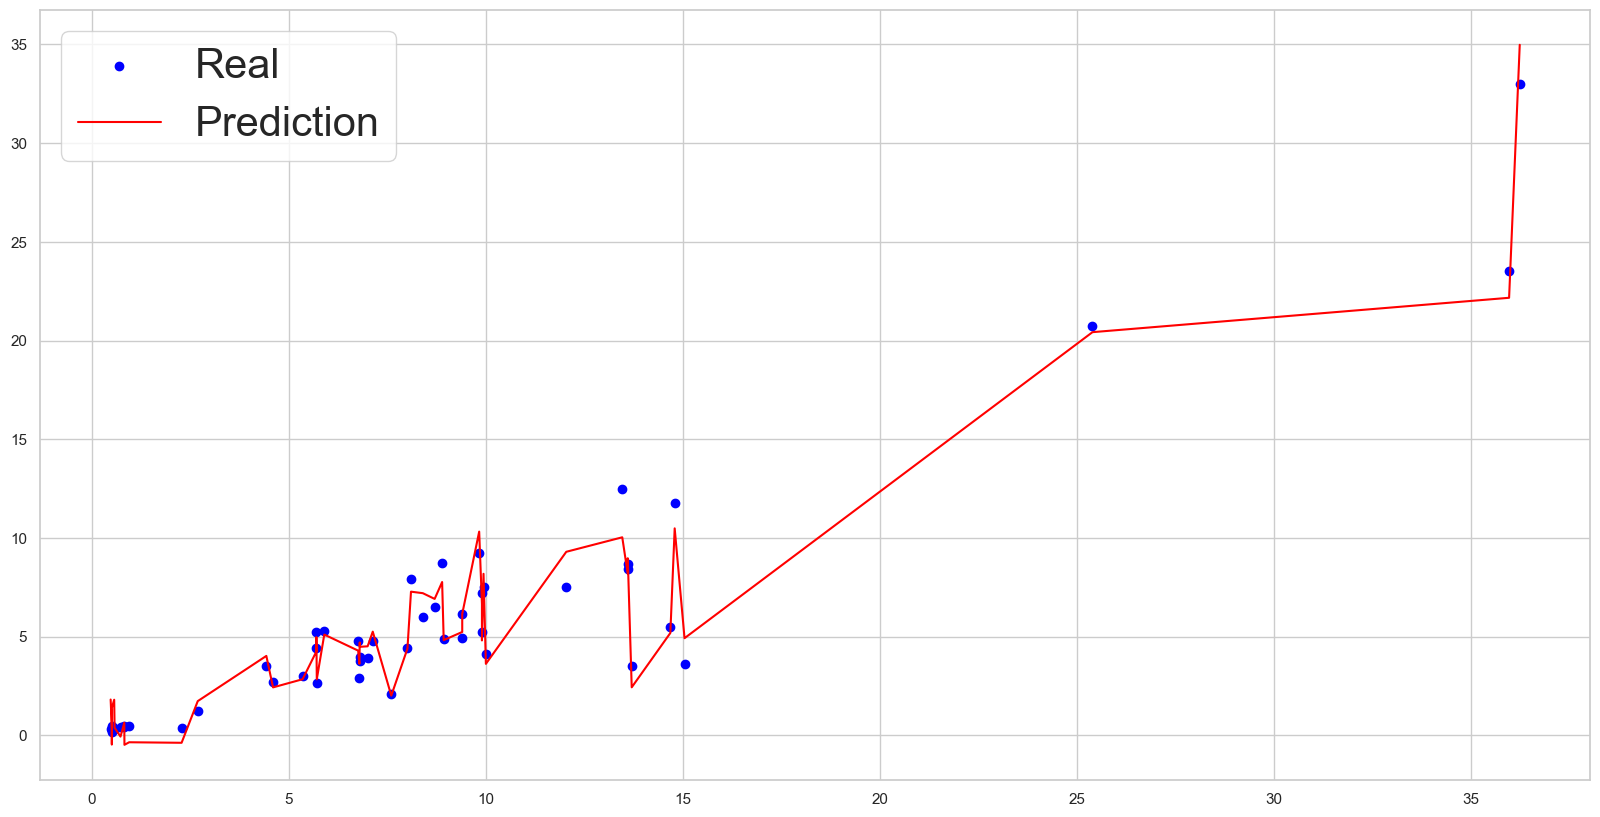

In [60]:
# checking the model by visualization

plt.figure(figsize=(20, 10))
plt.scatter(data.Present_Price , data.Y_test, color='blue', label="Real")
plt.plot(data.Present_Price, data.Y_pred, color='red', label="Prediction")
plt.legend(fontsize=30)
plt.show()